# **Import Basic Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

%config Completer.use_jedi = False

# **Data Preprocessing**

## Load Data

In [2]:
# read csv file
df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

orig_df = df.copy()

## Overview

In [3]:
# view first 5
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# some info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# some statistical info.
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


## Missing Values

In [6]:
# chek missing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

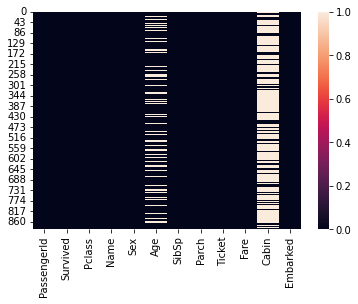

In [7]:
# visualize missing
sns.heatmap(df.isnull());

In [8]:
# fill NaN in Age by age mean
df.Age.fillna(df.Age.mean(), inplace = True)
test_df.Age.fillna(df.Age.mean(), inplace = True)

In [9]:
# check again
df.Age.isnull().sum()

0

## Duplicate Values

In [10]:
# no duplicate values
df.duplicated().any()

False

## Drop Unnecessary Column

In [11]:
df.drop(['PassengerId','Cabin','Name','Ticket'], axis=1,  inplace=True)

test_df_passenger_id = test_df.PassengerId
test_df.drop(['PassengerId','Cabin','Name','Ticket'], axis=1,  inplace=True)

## Converting Categorical

In [12]:
# Change to dummy variable columns and added to df.

# convert Sex column
sex_dummies = pd.get_dummies(df.Sex, drop_first=True)
sex_dummies2 = pd.get_dummies(test_df.Sex, drop_first=True)
# convert Embarked column
emb_dummies = pd.get_dummies(df.Embarked)
emb_dummies2 = pd.get_dummies(test_df.Embarked)

In [13]:
# join our dummies to our dataframe
df = df.join([sex_dummies, emb_dummies])
test_df = test_df.join([sex_dummies, emb_dummies])

In [14]:
# drop original column
df.drop(['Sex','Embarked'], axis=1, inplace=True)
test_df.drop(['Sex','Embarked'], axis=1, inplace=True)

In [15]:
# rename new column
# 1='Male', 0='Female'
df.rename(columns={'male':'Gender','C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S'}, inplace=True)
test_df.rename(columns={'male':'Gender','C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S'}, inplace=True)

### Data After Cleaning

In [16]:
# data is full numerical
df.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
208,1,3,16.0,0,0,7.7500,0,0,1,0
11,1,1,58.0,0,0,26.5500,0,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,0,1
395,0,3,22.0,0,0,7.7958,1,0,0,1
37,0,3,21.0,0,0,8.0500,1,0,0,1


# **Exploratory Data Analysis**

### Correlations between columns

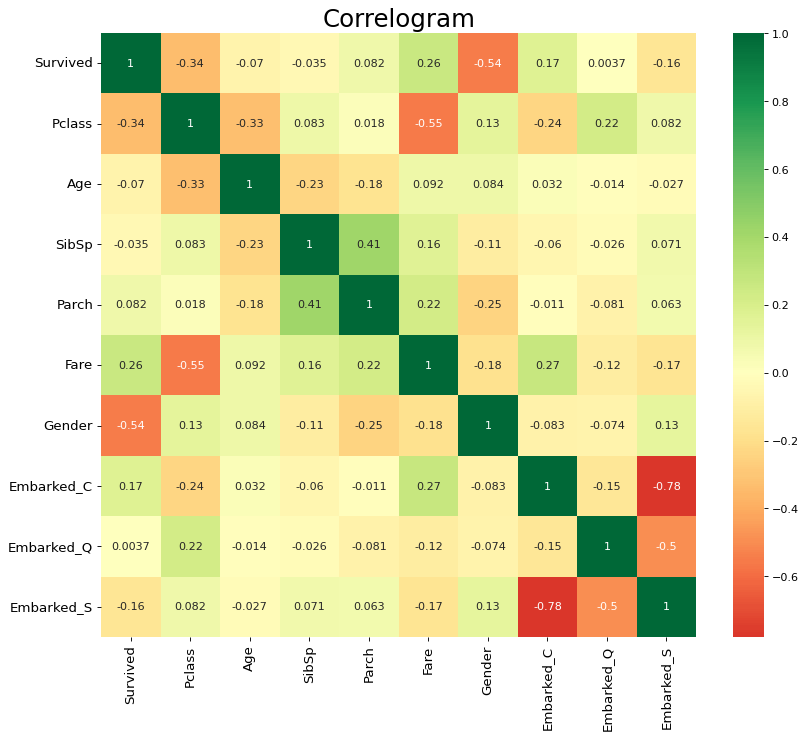

In [17]:
# correlations
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### The number of females and males

In [18]:
df.Gender.value_counts()

1    577
0    314
Name: Gender, dtype: int64

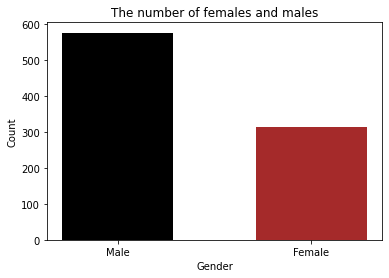

In [19]:
width = 0.4
left = [width, width+0.7]
height = df.Gender.value_counts().unique()
tick_label = ['Male','Female']
plt.bar(left, height, tick_label = tick_label, width = 0.4, color = ['black', 'brown'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('The number of females and males')
plt.show()

### What is the average age?

In [20]:
df.Age.mean()

29.69911764705882

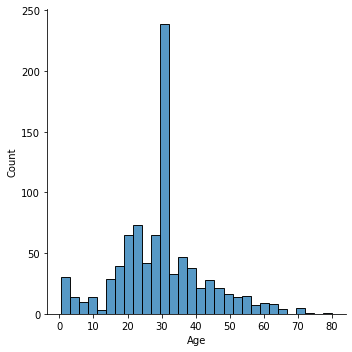

In [21]:
sns.displot(df, x='Age');
# we can also use (df.Age.hist(bins = 40))

### What is the average male,female age?

In [22]:
print('Average Female Age: ', df.groupby('Gender')['Age'].mean()[0])
print('Average Male Age: ', df.groupby('Gender')['Age'].mean()[1])

Average Female Age:  28.21673004870738
Average Male Age:  30.505824243042102


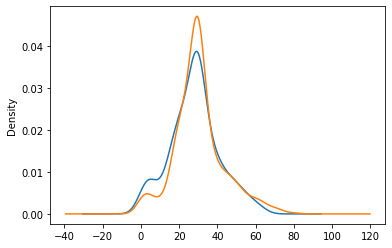

In [23]:
df.groupby('Gender').Age.plot(kind='kde');

### Number of survivors and Dead

In [24]:
print('Number of survivors: ',df.Survived.value_counts()[1])
print('Number of dead: ',df.Survived.value_counts()[0])

Number of survivors:  342
Number of dead:  549


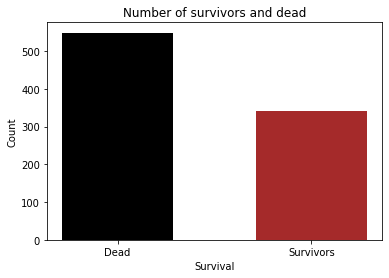

In [25]:
width = 0.4
left = [width, width+0.7]
height = df.Survived.value_counts().unique()
survived_tick_label = ['Dead','Survivors']
plt.bar(left, height, tick_label = survived_tick_label, width = 0.4, color = ['black', 'brown'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Number of survivors and dead')
plt.show()

In [26]:
# we can also use
# sns.countplot(data=df, x='Survived', hue='Gender')

### What is the number of survivors and deaths of each gender?

In [27]:
df.query("Survived==1").groupby('Gender')['Survived'].count()

Gender
0    233
1    109
Name: Survived, dtype: int64

In [28]:
df.query("Survived==0").groupby('Gender')['Survived'].count()

Gender
0     81
1    468
Name: Survived, dtype: int64

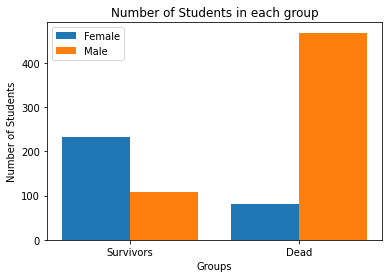

In [29]:
X = ['Survivors', 'Dead']
female_vals = [233,81]
male_vals = [109,468]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, female_vals, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male_vals, 0.4, label = 'Male')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

### Other research

In [30]:
df.groupby('Survived').mean()


,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
Survived,,,,,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887,0.852459,0.136612,0.085610,0.777778
1,1.950292,28.549778,0.473684,0.464912,48.395408,0.318713,0.271930,0.087719,0.634503


# **Building ML Model (Logistic Regression Algorithm)**

The usual steps are:
* Instantiate
* Fit (on train)
* Predict (on test)
* Score (compare predict to test)


In [31]:
# Target
y = df.Survived
# Feathers
x = df.drop('Survived', axis=1)

In [32]:
# dividing data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)

In [33]:
# use sklearn Logistic Regression to fit a logistic model
# logistic model
log_mod = LogisticRegression(max_iter=5000)
# fit logistic model using train data
log_mod.fit(X_train, y_train)
# predict y based on x
preds = log_mod.predict(X_test)

In [34]:
# our prediction
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0])

In [35]:
# real values that we're trying to predict
y_test.values

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0])

model evaluation

In [36]:
confusion_matrix(y_test, preds)

array([[64, 10],
       [11, 49]])

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        74
           1       0.83      0.82      0.82        60

    accuracy                           0.84       134
   macro avg       0.84      0.84      0.84       134
weighted avg       0.84      0.84      0.84       134



### Now we are trying to predict y based on the data provided and required for submission.

In [38]:
test_df.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Gender        0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [39]:
test_df.Fare.fillna(df.Fare.mean(), inplace = True)

In [40]:
subm_preds = log_mod.predict(test_df)
subm_preds

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [41]:
test_df_passenger_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [42]:
submission = pd.DataFrame({
        "PassengerId": test_df_passenger_id,
        "Survived": subm_preds})

In [43]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,1


In [44]:
submission.to_csv('submission.csv', index=False)

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Table of Contents</h1>